**Computational Models for Complex Systems Project - University of Pisa**

**Authors**: Giulia Ghisolfi

# Protein Synthesis Simulation
### Comparative Analysis of Models Utilizing Different Resources

The objective of these experiments is to evaluate how the model's performance, in terms of the number of synthesized proteins and execution times, varies with the number of available resources.

In order to understand whether the differences in performance are solely due to the random components of the model or actually to the different available resources, each experiment was conducted twice:

1. The first set of experiments was conducted without setting a seed for random variables.
2. The second set of experiments was conducted with a seed set for random components, ensuring that for all models, the random variables were set equally, and the input DNA sequences introduced into the cell for protein synthesis were the same and in the same order.

Load dataset:

In [1]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,ID,sequence,category
0,NM_001368254.1,GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...,NM
1,NM_001350977.1,TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...,NM


## Simulation

In [2]:
from src.simulation import ProteinSinthesisProcess

Load parameters:

In [1]:
import json

parameters_path_1 = 'data/parameters_ribosome.json'
parameters_1 = json.load(open(parameters_path_1, 'r'))

parameters_path_2 = 'data\parameters_rna_polymerases.json'
parameters_2 = json.load(open(parameters_path_2, 'r'))

In [2]:
from itertools import product

parameters_sets = list(product(*parameters_1.values())) + list(product(*parameters_2.values()))
TEST_NAME = 'models_comparison_'

Start simulations:

In [5]:
for i, set in enumerate(parameters_sets):
    ps = ProteinSinthesisProcess(data_df, *set[1:])

    print(f'Starting simulation of test set {i}')
    print(ps)
    ps.run(simulation_time=set[0]) # run the simulation

    ps.save_process(folder_test_name=TEST_NAME+f'{i}') # save the process
    
    # save the parameters
    with open(f'results/'+TEST_NAME+f'{i}/parameters.json', 'w') as f:
        json.dump({k: v for k, v in zip(parameters_1.keys(), set)}, f)
    
    print(f'Finished test: {i+1}/{len(parameters_sets)}\n')

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 0
Protein Sinthesis Process:
185310 dna sequences to synthesize,
100 resources available,
100 RNA polymerases,
2 ribosomes,
50000.0 uracil bases,
50000.0 adenine bases,
50000.0 guanine bases,
50000.0 cytosine bases.
Simulation started
End simulation: 134 proteins synthesized from 48 DNA sequences.
Process saved.
Finished test: 1/6

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 1
Protein Sinthesis Process:
185310 dna sequences to synthesize,
100 resources available,
100 RNA polymerases,
10 ribosomes,
50000.0 uracil bases,
50000.0 adenine bases,
50000.0 guanine bases,
50000.0 cytosine bases.
Simulation started
End simulation: 1761 proteins synthesized from 183 DNA sequences.
Process saved.
Finished test: 2/6

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 2
Protein Sinthesis Process:
185310 dna sequenc

Start the simulation with the random seed set:

In [6]:
RANDOM_SEED = 42

for i, set in enumerate(parameters_sets):
    # set the random seed
    set = list(set)
    set[9] = RANDOM_SEED
    
    ps = ProteinSinthesisProcess(data_df, *set[1:])

    print(f'Starting simulation of test set {i}')
    print(ps)
    ps.run(simulation_time=set[0]) # run the simulation

    ps.save_process(folder_test_name=TEST_NAME+'seed_'+f'{i}') # save the process
    
    # save the parameters
    with open(f'results/'+TEST_NAME+f'{i}/parameters.json', 'w') as f:
        json.dump({k: v for k, v in zip(parameters_1.keys(), set)}, f)
    
    print(f'Finished test: {i+1}/{len(parameters_sets)}\n')

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 0
Protein Sinthesis Process:
185310 dna sequences to synthesize,
100 resources available,
100 RNA polymerases,
2 ribosomes,
50000.0 uracil bases,
50000.0 adenine bases,
50000.0 guanine bases,
50000.0 cytosine bases.
Simulation started
End simulation: 141 proteins synthesized from 49 DNA sequences.
Process saved.
Finished test: 1/6

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 1
Protein Sinthesis Process:
185310 dna sequences to synthesize,
100 resources available,
100 RNA polymerases,
10 ribosomes,
50000.0 uracil bases,
50000.0 adenine bases,
50000.0 guanine bases,
50000.0 cytosine bases.
Simulation started
End simulation: 1937 proteins synthesized from 214 DNA sequences.
Process saved.
Finished test: 2/6

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 2
Protein Sinthesis Process:
185310 dna sequenc

## Results

In [3]:
from src.utils.plot_utils import *
import pandas as pd

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Load the results of the simulations:

In [4]:
results_df_list, results_df_list_seed = [], []
rna_polymerase_dict_list, rna_polymerase_dict_list_seed = [], []
ribosome_dict_list, ribosome_dict_list_seed = [], []
parameters_dict_list = []

for i in range(len(parameters_sets)):
    results_df = pd.read_csv(f'results/'+TEST_NAME+f'{i}/results.csv', index_col=0)
    results_df_list.append(results_df)

    results_df = pd.read_csv(f'results/'+TEST_NAME+'seed_'+f'{i}/results.csv', index_col=0)
    results_df_list_seed.append(results_df)

    with open(f'results/'+TEST_NAME+f'{i}/rna_polymerase_history.json', 'r') as f:
        rna_polymerase_dict_list.append(json.load(f))
    with open(f'results/'+TEST_NAME+'seed_'+f'{i}/rna_polymerase_history.json', 'r') as f:
        rna_polymerase_dict_list_seed.append(json.load(f))

    with open(f'results/'+TEST_NAME+f'{i}/ribosome_history.json', 'r') as f:
        ribosome_dict_list.append(json.load(f))
    with open(f'results/'+TEST_NAME+'seed_'+f'{i}/ribosome_history.json', 'r') as f:
        ribosome_dict_list_seed.append(json.load(f))
        
    with open(f'results/'+TEST_NAME+f'{i}/parameters.json', 'r') as f:
        parameters_dict_list.append(json.load(f))

Display model parameters:

In [5]:
display_model_parameters(parameters_dict_list)

Parameters shared by all models:
simulation_time: 3600
number_resources: 100
number_rna_transfers_per_codon: 1000
uracil_initial_amount: 50000.0
adenine_initial_amount: 50000.0
guanine_initial_amount: 50000.0
cytosine_initial_amount: 50000.0

Paramethers that differ between models:
   number_rna_polymerases  number_ribosomes
0                     100                 2
1                     100                10
2                     100               100
3                       2                50
4                      50                50
5                     100                50


In our comparative analysis, we examined six distinct models numbered from 0 to 5, each of which was run twice as indicated above. All simulations lasted for 1 hour (3600 seconds), using a discrete time unit of 0.0001 seconds.

The parameters of each model are listed below. We varied the number of ribosomes incrementally in the first three experiments, while keeping the RNA polymerase value constant at 100. In the last three experiments, we fixed the number of ribosomes at 50 and varied the number of RNA polymerases.

The availability of other resources was deliberately set to high values to ensure they were not limiting factors, allowing us to focus on analyzing the model's performance as the number of RNA polymerases and ribosomes varied.

### Number of Proteins

The first factor we analyzed to compare our experiments is the total number of proteins synthesized during the simulations. We observe that for each pair of simulations on the same model, the number of proteins varies, but remains within the same range. 

This indicates that while the random components of the model naturally impact the results, the number of available resources has a greater influence. In fact, we can observe significantly different values among the experiments conducted with the different models, thus validating our analysis.

In [6]:
number_of_proteins_synthesized = pd.DataFrame(columns=[
    'number_rna_polymerases', 'number_ribosomes', 'number_of_proteins_synthesized', 'number_of_proteins_synthesized_seed'])
number_of_proteins_synthesized['number_rna_polymerases'] = [parameters_df['number_rna_polymerases'
    ] for parameters_df in parameters_dict_list]
number_of_proteins_synthesized['number_ribosomes'] = [parameters_df['number_ribosomes'
    ] for parameters_df in parameters_dict_list]
number_of_proteins_synthesized['number_of_proteins_synthesized'] = [results_df['number_of_proteins_synthesized'
    ].sum() for results_df in results_df_list]
number_of_proteins_synthesized['number_of_proteins_synthesized_seed'] = [results_df['number_of_proteins_synthesized'
    ].sum() for results_df in results_df_list_seed]
number_of_proteins_synthesized

,number_rna_polymerases,number_ribosomes,number_of_proteins_synthesized,number_of_proteins_synthesized_seed
0,100,2,134,141
1,100,10,1761,1937
2,100,100,6408,6163
3,2,50,700,742
4,50,50,6332,6521
5,100,50,6144,6129


Additionally, it's noteworthy that models 2, 4, and 5 synthesize a similar number of proteins. Therefore, we expect to observe similar behaviors from these models, especially between 2 and 5, which have almost the same number of synthesized proteins in experiments where the seed was set.

For both of these models, the RNA polymerase resource was set to 100, and the number of ribosomes to 100 and 50, respectively. In the case in which a random seed is setted, we can observe that the total number of synthesized proteins is slightly higher in the first case (6163 versus 6129). This indicates that doubling the number of ribosomes does not accelerate the process if the number of RNA polymerases is not increased. In this case, the bottleneck of our simulations is the number of RNA polymerases.

Model 4 is the one that yields the highest number of proteins.

Models 0 and 3 perform significantly worse than the others in terms of the number of proteins produced. However, this is an expected result as these two models have the most limited number of resources: 2 ribosomes for model 0 and 2 RNA polymerases for model 3.

It's important to note that the random seed is set, but in some processes, the random object is called multiple times in the same class. For example, in transcription, the random object is called to determine whether there should be a transcription error, to determine the length of the PolyA tail, and for the timing of nucleotide base requests and degradation. Therefore, the total transcription time of a certain sequence may vary from model to model, even though the sequence does not encounter queues in the release of requested resources. This is because the implementation of the protein synthesis simulation model is designed to allow setting seeds to make the results of an experiment reproducible. Certainly, the order in which the sequences are inputted is the same, but there will still be differences among the various outputs.

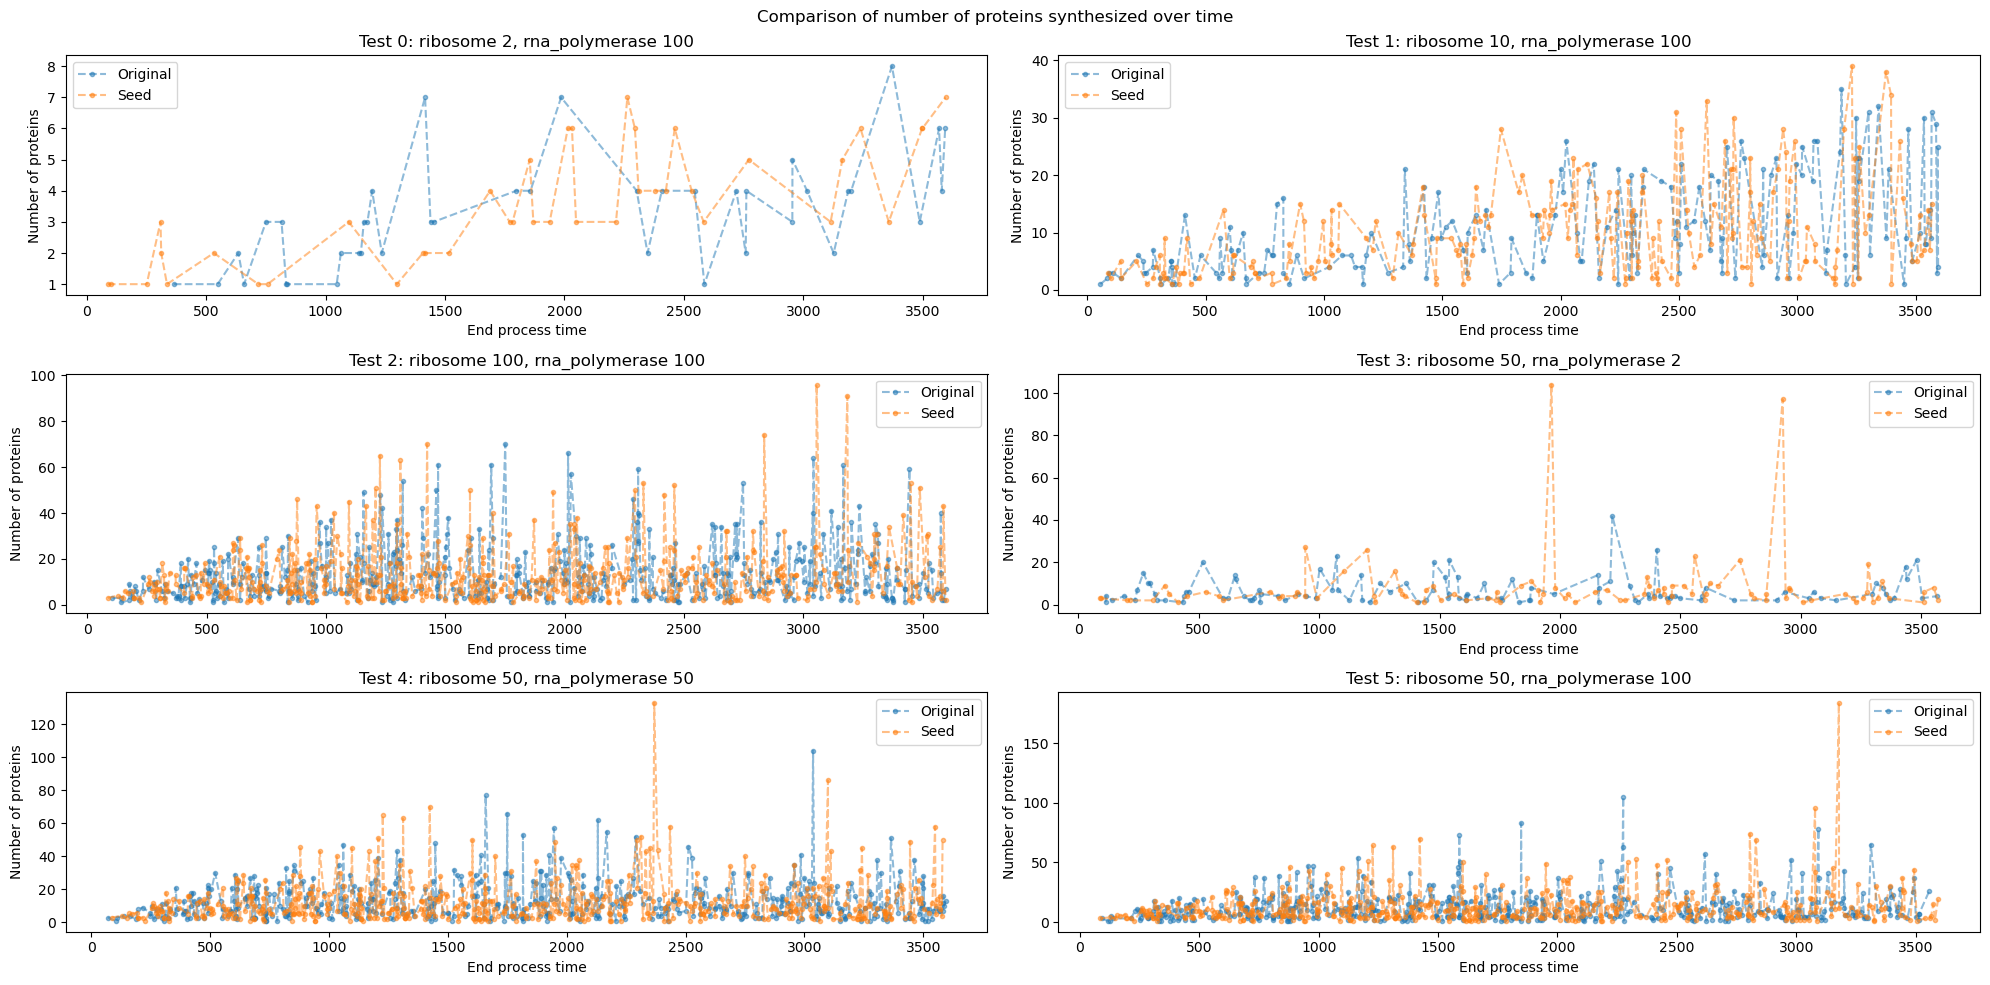

In [7]:
compare_proteins_number_over_time(results_df_list, results_df_list_seed, parameters_dict_list)

We also analyzed the number of synthesized proteins relative to the length of mature mRNA. It is evident that in all cases, the number of synthesized proteins is inversely proportional to the length of mRNA, as expected from the previous experiment.

The same observations reported in the notebook `12h_simulation.ipynb` apply.

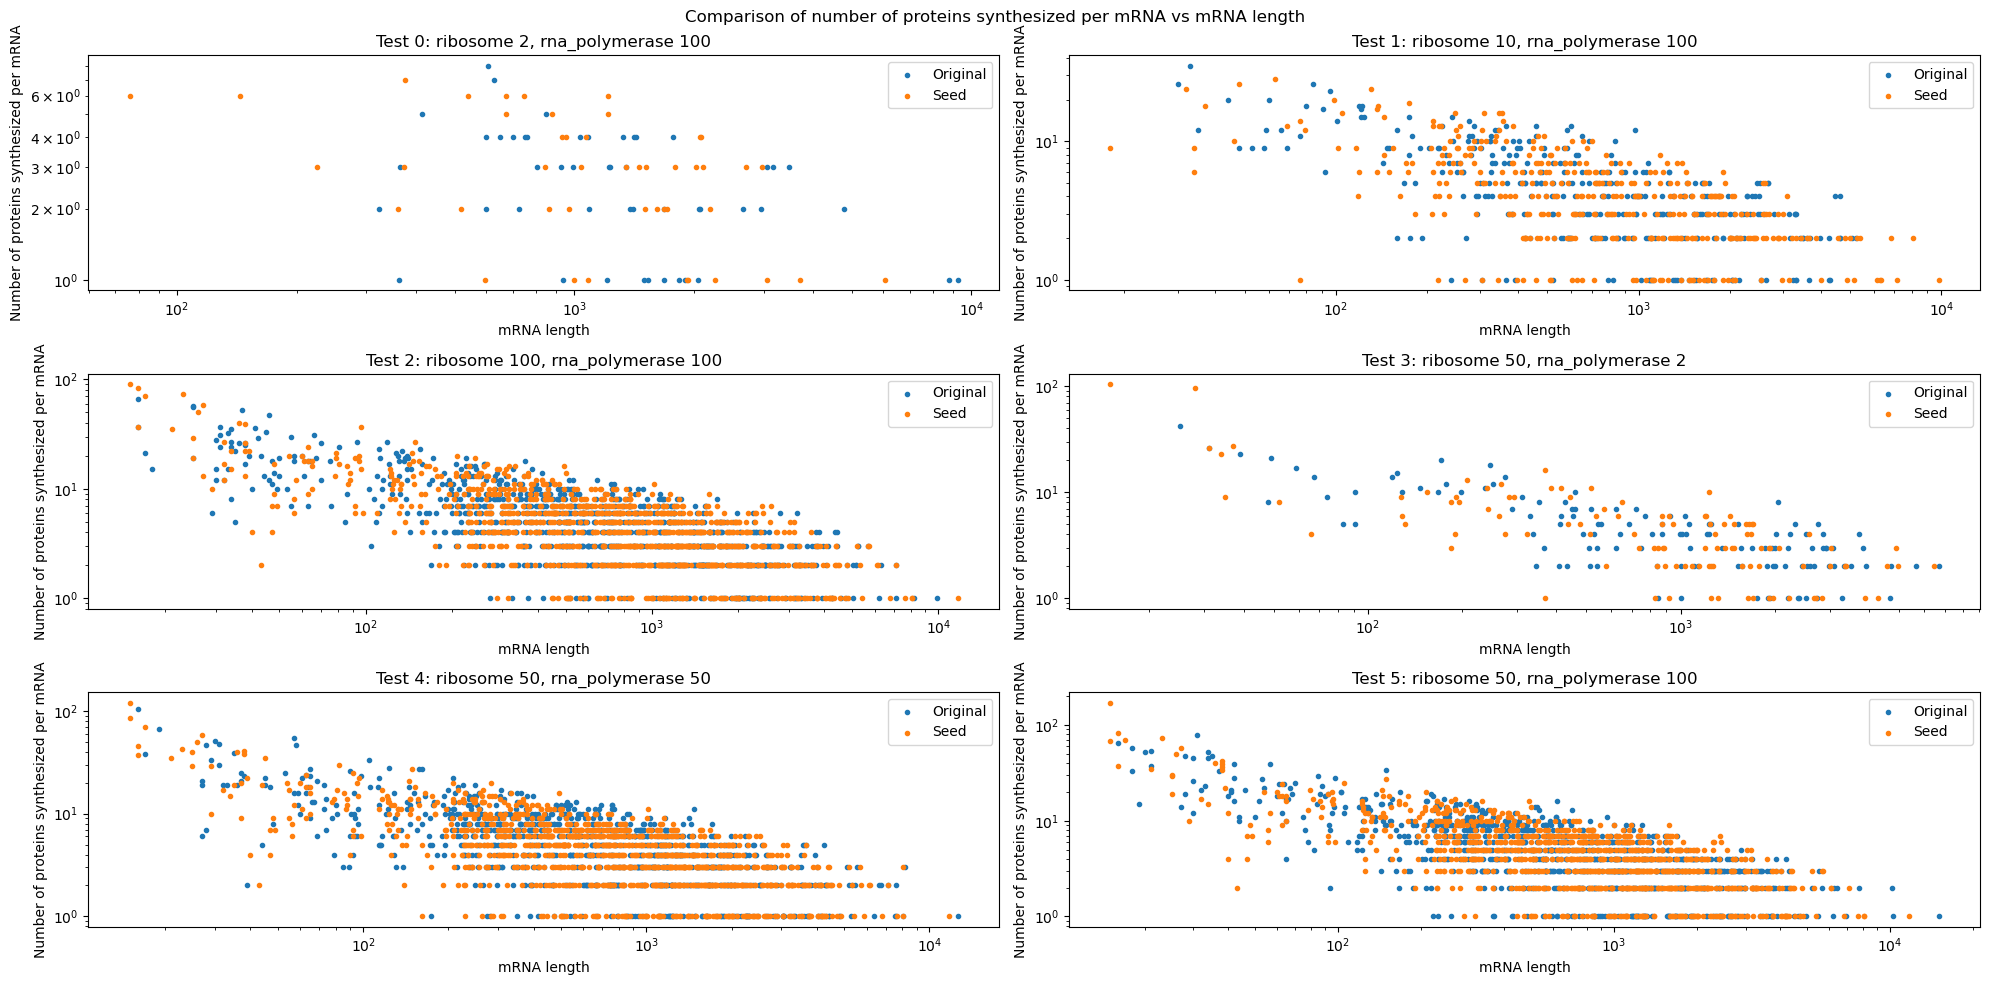

In [8]:
compare_number_proteins_per_length_mrna(results_df_list, results_df_list_seed, parameters_dict_list)

### Process time

For the total process time analysis, we examined the time required to complete the protein synthesis process, from when the DNA sequence enters the cell to when mRNA is degraded, relative to the process start time. 

Across all models, except for model 2, the plots show a growing trend, indicating that as simulation time progresses, the total time required to complete a process increases. 

It's important to note that total process times were calculated only for DNA sequences that, at the end of the simulation, had completed the entire process, from transcription to mRNA degradation. Consequently, fewer data points are available for some models. For instance, in model 0, there are significantly fewer data points, and the last available data point for total process time corresponds to a DNA sequence that initiated its process before halfway through the simulation duration.

Similarly, in the experiments for model 3, the last available data point for total process time corresponds to a DNA sequence that initiated around 1100 seconds from the start of the simulation. Furthermore, in both experiments for this model, the growth trend is much more pronounced compared to other experiments, likely due to the limitation of the RNA polymerase resource, which significantly slows down the total process times. However, once this bottleneck is overcome, processes are more likely to be completed.

In contrast, in the experiments for model 0, where ribosomes are the limiting resource, fewer DNA sequences complete the process. This is because the degradation probability of an mRNA depends, among other factors, on the number of times the mRNA has interacted with a ribosome. As a result, a queue forms for resource usage, preventing the synthesis of new proteins and also the degradation of existing mRNAs in the cell.

Finally, it's worth noting that the only model for which we have DNA sequences starting and completing a process throughout the simulation duration is model 2. This is the model where the number of resources is not limiting.

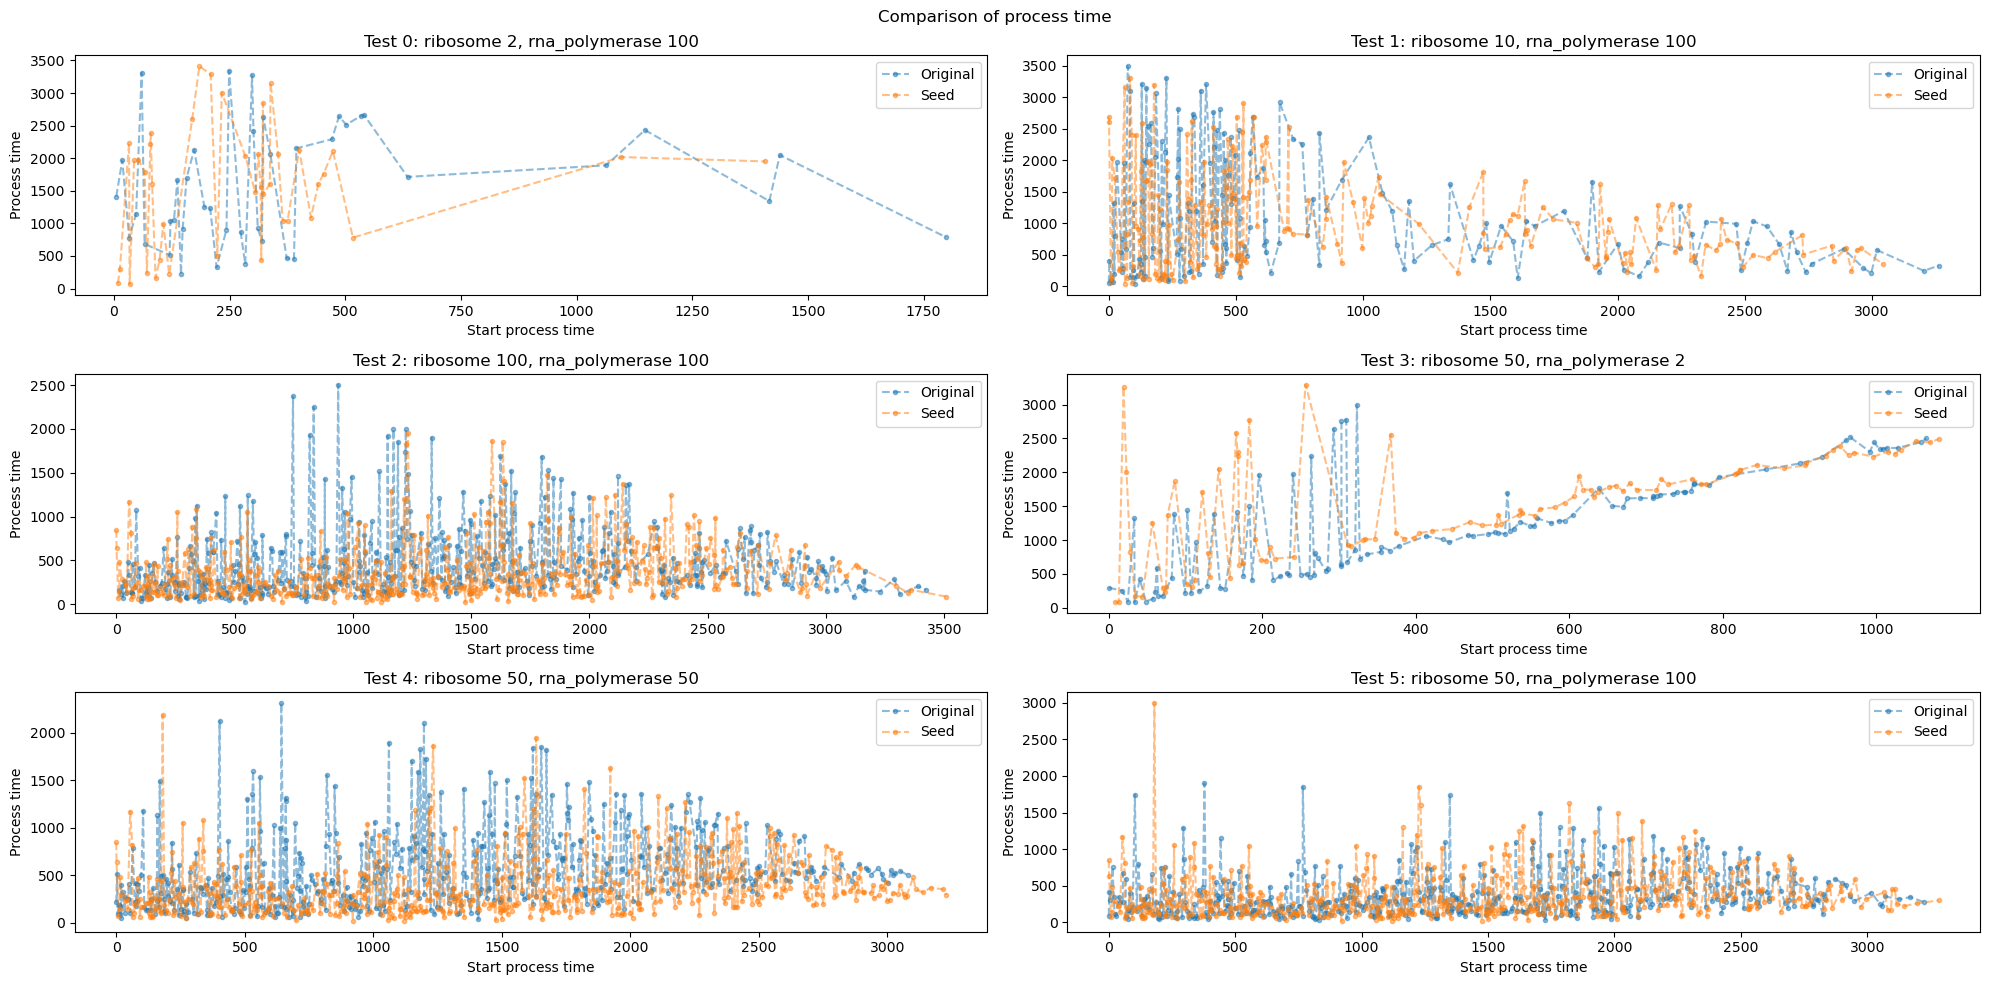

In [9]:
compare_process_time(results_df_list, results_df_list_seed, parameters_dict_list)

We further explored the relationship between mRNA lifetime and mRNA length. As discussed in `12h_simulation.ipynb`, we observed that mRNA lifetime tends to decrease as mRNA length increases, a trend consistent across all experiments except those involving model 0.

The two sets of figures below illustrate this relationship, with mature mRNA lifetime plotted against mRNA length. In the first set of graphs, both axes are logarithmically scaled, offering a comprehensive view of the data distribution. In the second set, we present the same data without logarithmic scaling for clarity.

Interestingly, experiments involving model 1 show a less pronounced decay in mRNA lifetime concerning mRNA length compared to other models. Some data points in these experiments deviate from the expected trend, indicating potential outliers.

In contrast, while experiments with model 0 still exhibit a decreasing trend in mRNA lifetime with increasing mRNA length, the effect is notably less pronounced compared to other models.

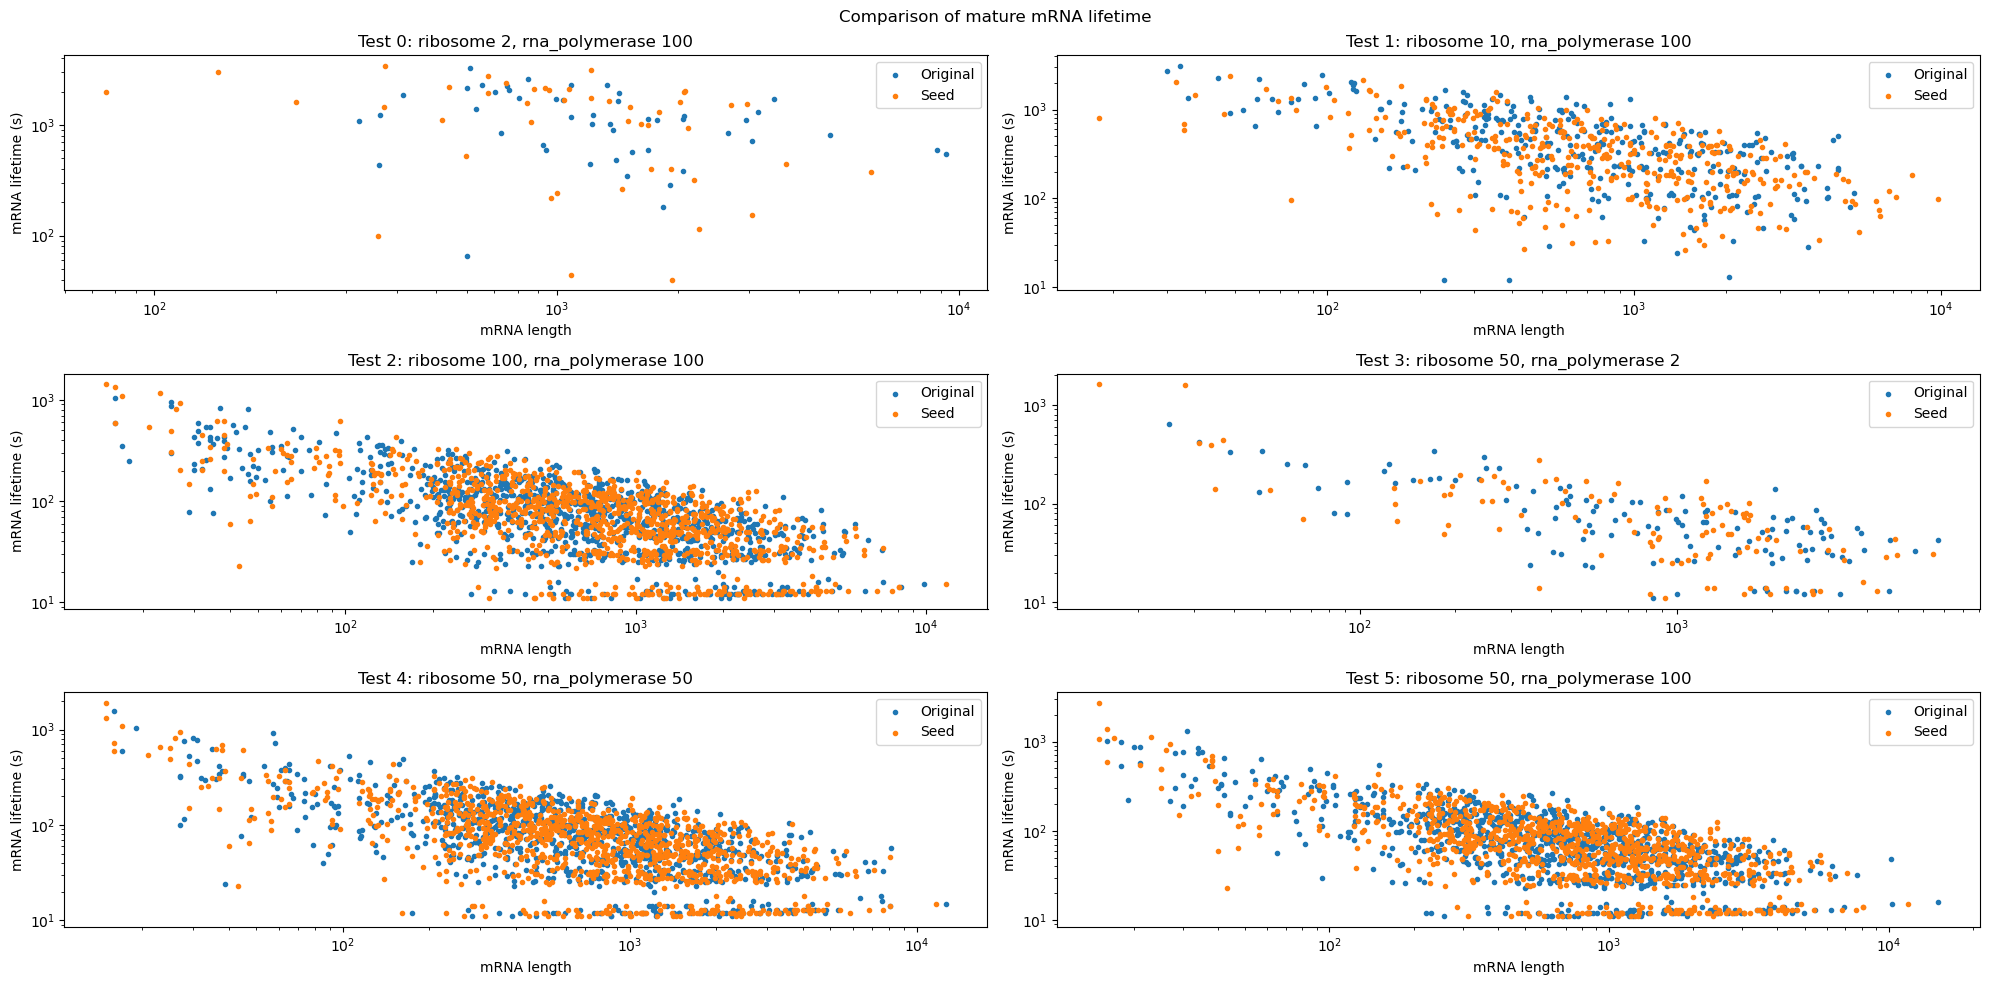

In [10]:
compare_mrna_lifetime(results_df_list, results_df_list_seed, parameters_dict_list, scale='log')

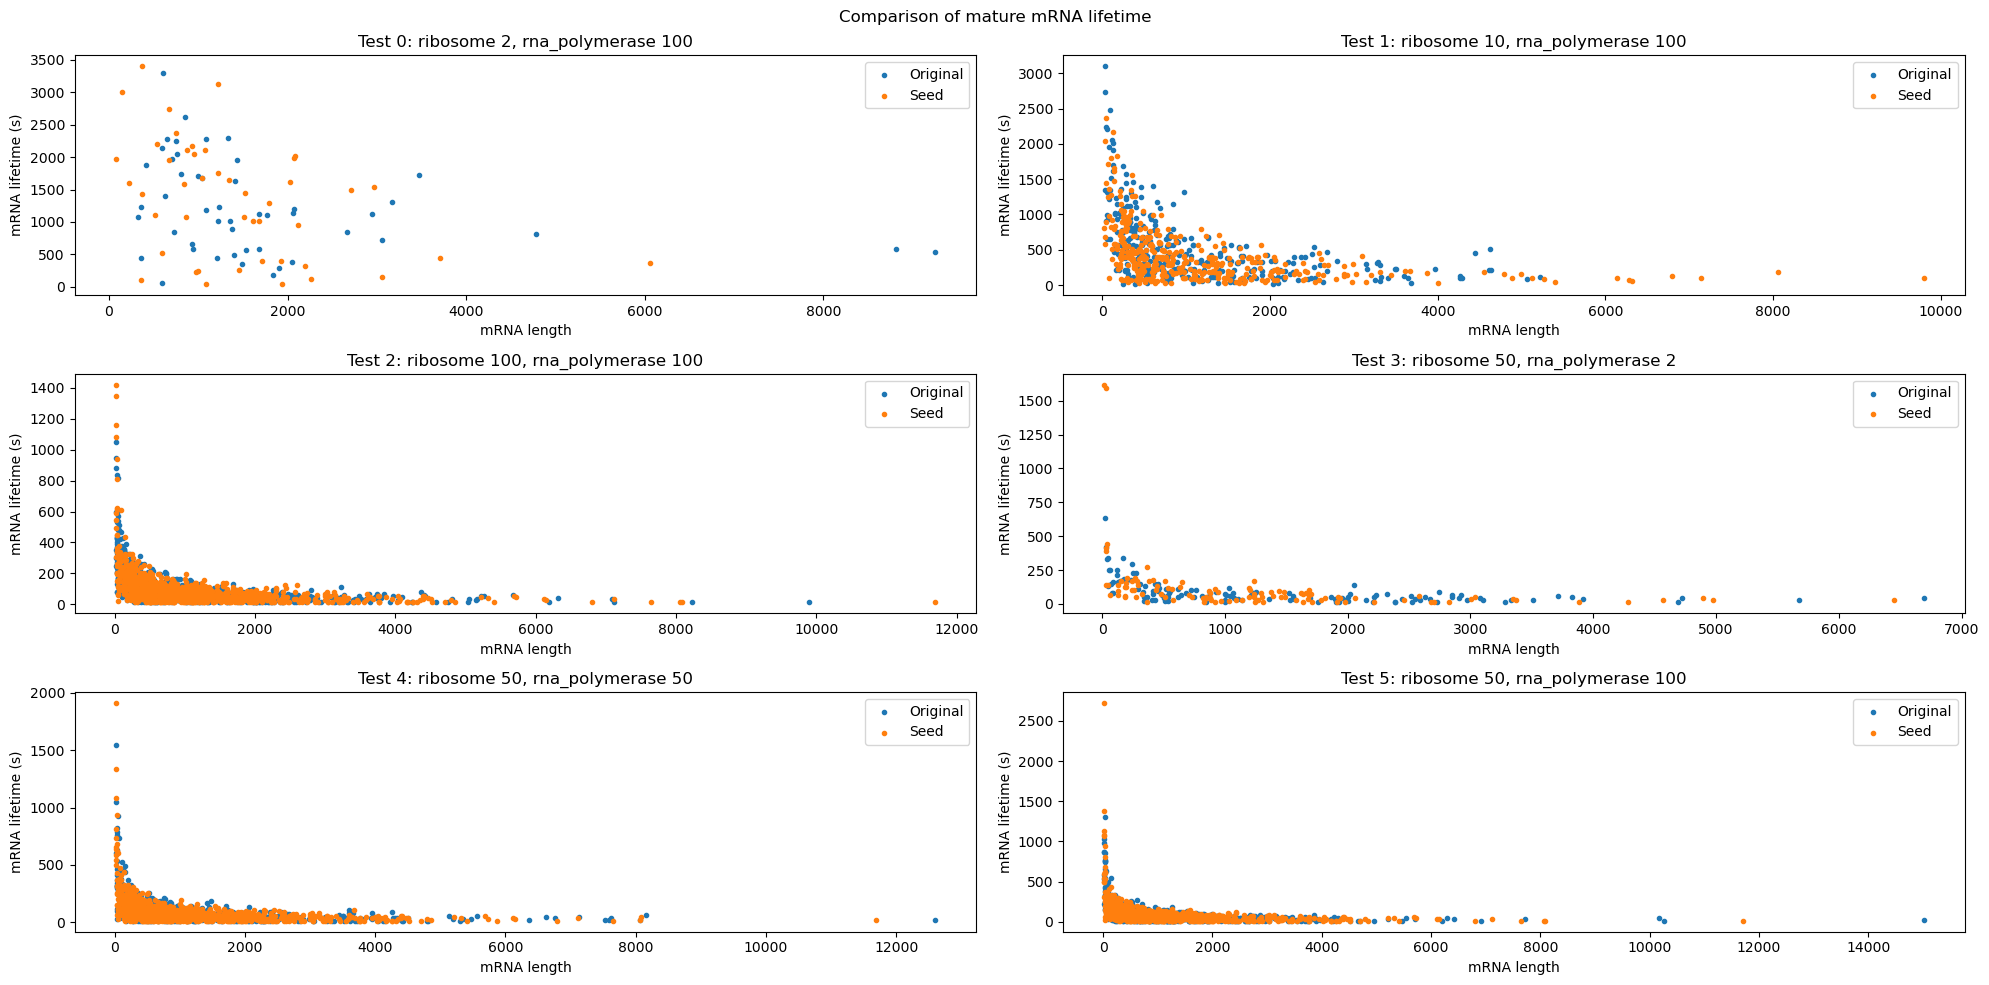

In [11]:
compare_mrna_lifetime(results_df_list, results_df_list_seed, parameters_dict_list)

### Resources waiting time

The final aspect of our analysis concerns the waiting time for resources. The graphs below allow us to compare the waiting times for requested resources, providing insights into which resource acts as a bottleneck in the process.

In the graphs, we focus solely on RNA polymerase and ribosomes since all other resources did not appear to be limiting factors in any of the other experiments.

The figure below displays the waiting time comparisons for ribosomes, indicating that ribosomes serve as a limiting resource only for the first two models, consistent with our expectations based on the chosen parameters for those specific experiments and previous observations.

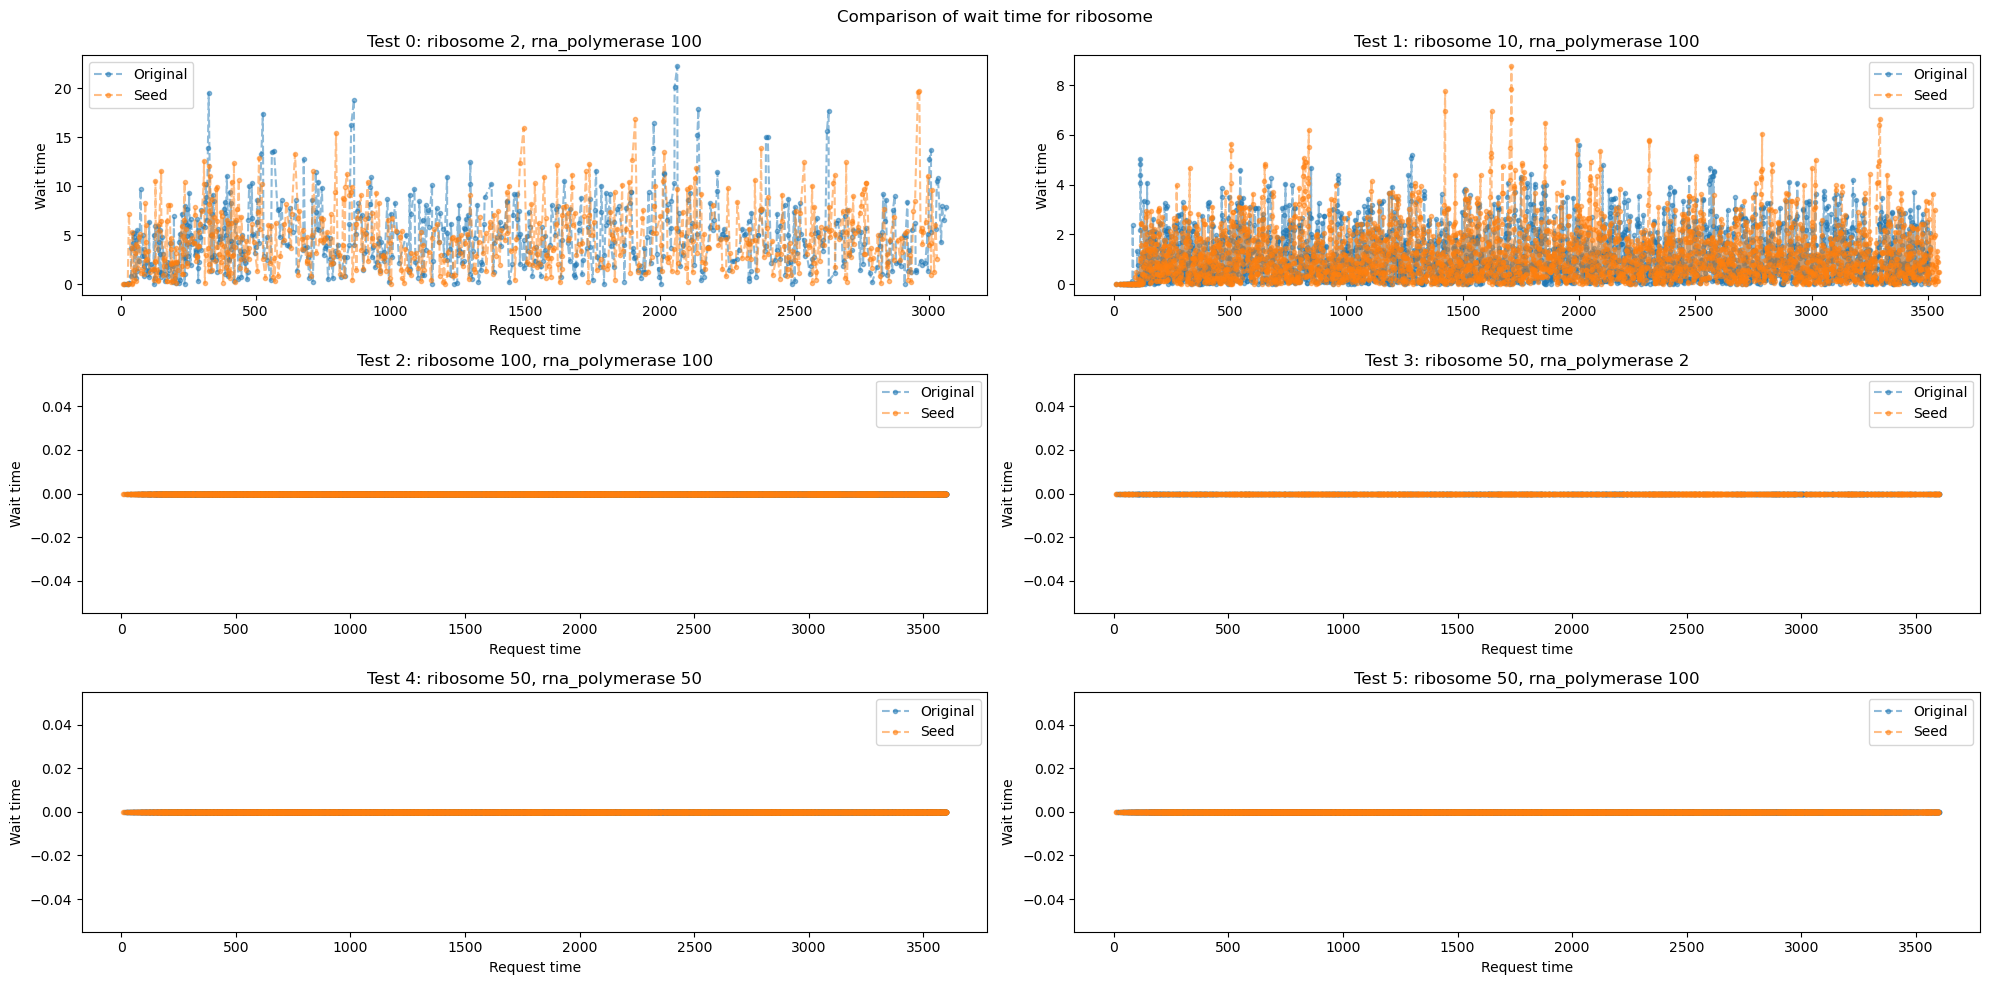

In [26]:
compare_wait_time(ribosome_dict_list, ribosome_dict_list_seed, parameters_dict_list, 'ribosome')

In the second figure below, we present the waiting time comparisons for RNA polymerase, highlighting its role as a limiting resource for experiments conducted with the last three models. As anticipated, for almost the entire duration of the simulation time in experiments conducted with model number 3, RNA polymerase exhibits a queue of requests, further highhlight that the number of available resources is insufficient to meet the demands.

In experiments with models 4 and 5, requests begin to experience waiting times only towards the end of the experiments.

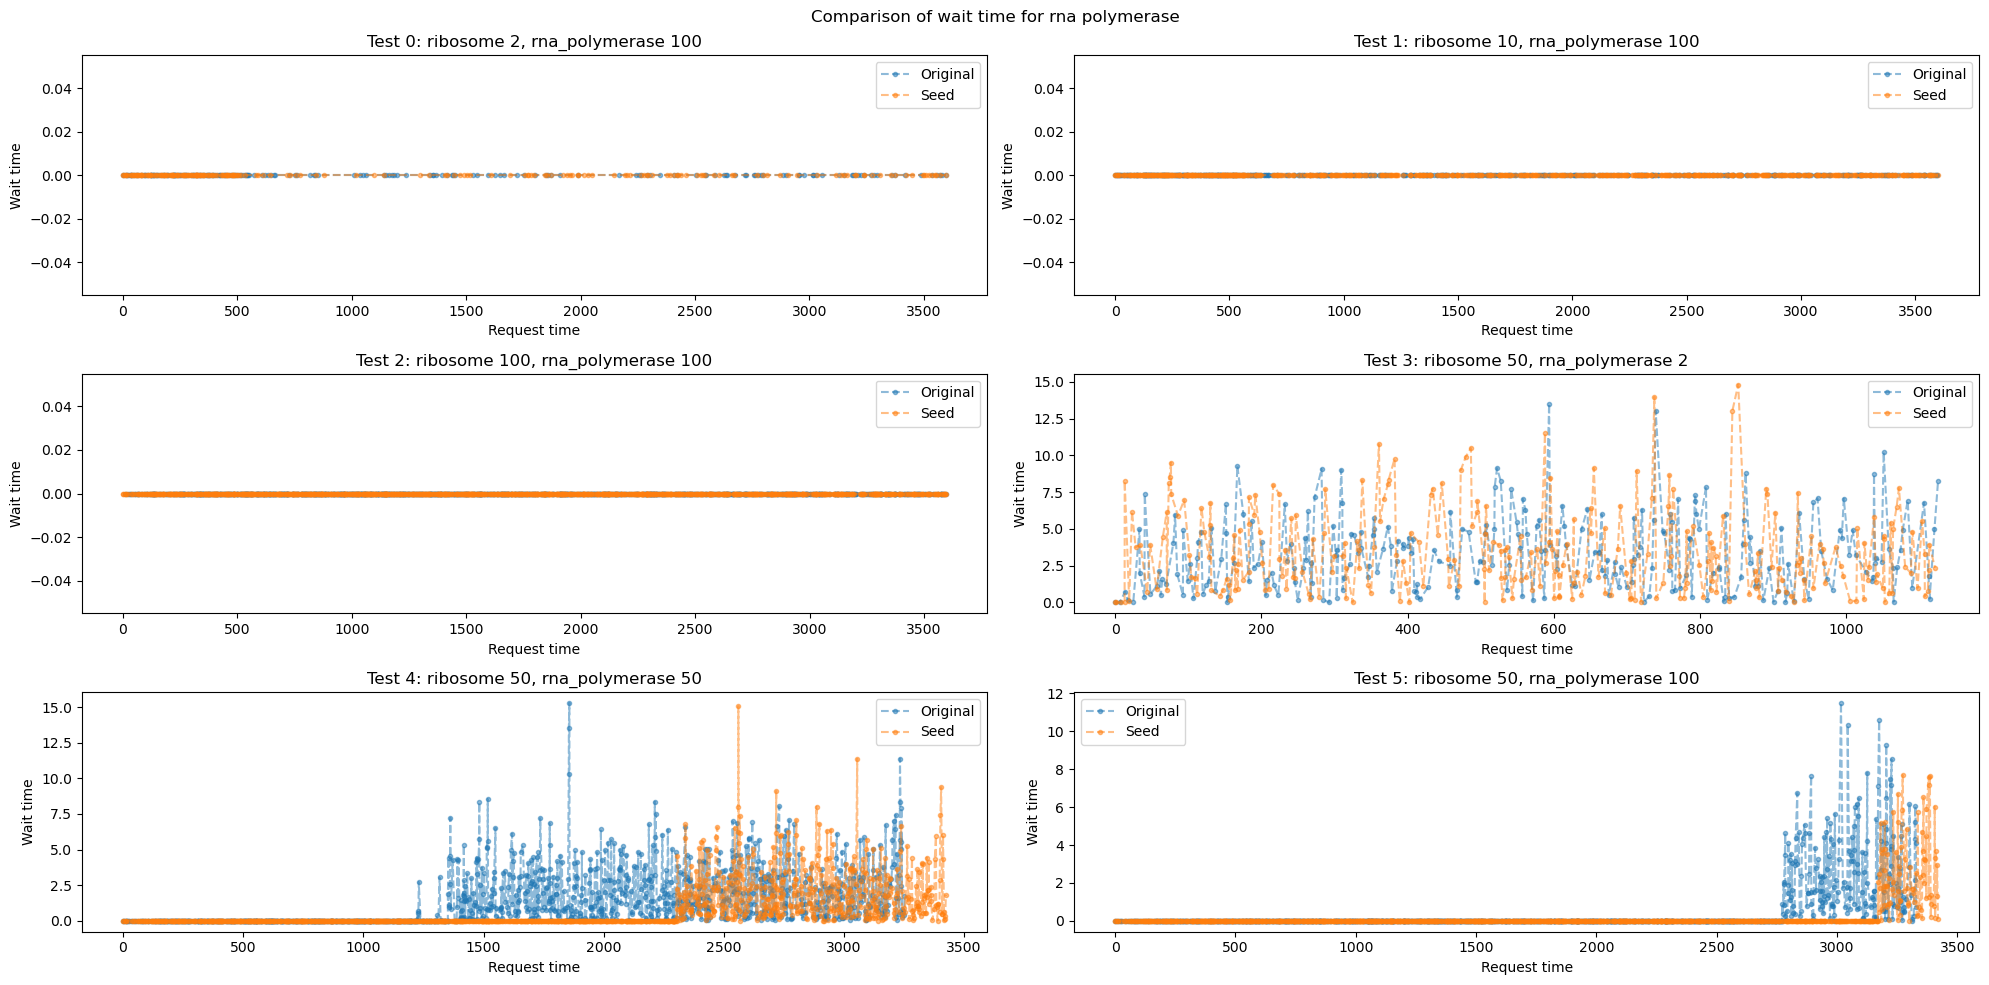

In [27]:
compare_wait_time(rna_polymerase_dict_list, rna_polymerase_dict_list_seed, parameters_dict_list, 'rna polymerase')

## Conclusion

In conclusion, our analysis of the protein synthesis simulation highlight several key aspects of the process and the factors influencing its efficiency.

1. **Impact of Resource Availability**: Our experiments demonstrate that the availability of resources, such as RNA polymerase and ribosomes, has a more significant impact on the performance of the model compared to random components. Variations in the number of available resources significantly affect the total number of synthesized proteins and the overall process duration.

2. **Dependency on Resource Type**: Among the resources considered, RNA polymerase emerged as a limiting factor during the early stages of the process, while ribosomes posed limitations in later stages. The limitation of the number of ribosomes also influences the number of synthesized proteins and the probability of degradation of mature mRNA, thereby affecting the completion of the synthesis process. This dependency highlights the critical role of resource allocation in determining the efficiency of protein synthesis.

3. **Relationship Between mRNA Length and Number of Synthesized Proteins**: Analyzing the relationship between mRNA length, lifetime, and number of synthesized proteins revealed consistent trends across different experiments. Shorter mRNA sequences tended to yield a higher number of synthesized proteins, while mRNA lifetime exhibited an inverse relationship with sequence length.

4. **Effect of Waiting Times**: The waiting times for resources provided insights into the bottlenecks within the protein synthesis process. Models with insufficient resource availability experienced longer waiting times, resulting in the synthesis of fewer proteins and longer average synthesis process durations.

These analyses contribute to a deeper understanding of the contribution of each resource to the modeled protein synthesis process, and how the synthesis outcomes are influenced by the characteristics of mRNA sequences and the chosen modeling parameters.